In [ ]:
import datetime
import numpy as np
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1kL8-RFN7ysoM5-40GlniUl14D-lO1GV2/view?usp=share_link'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Emotion_final.csv')
data=pd.read_csv('Emotion_final.csv') 
 

In [ ]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

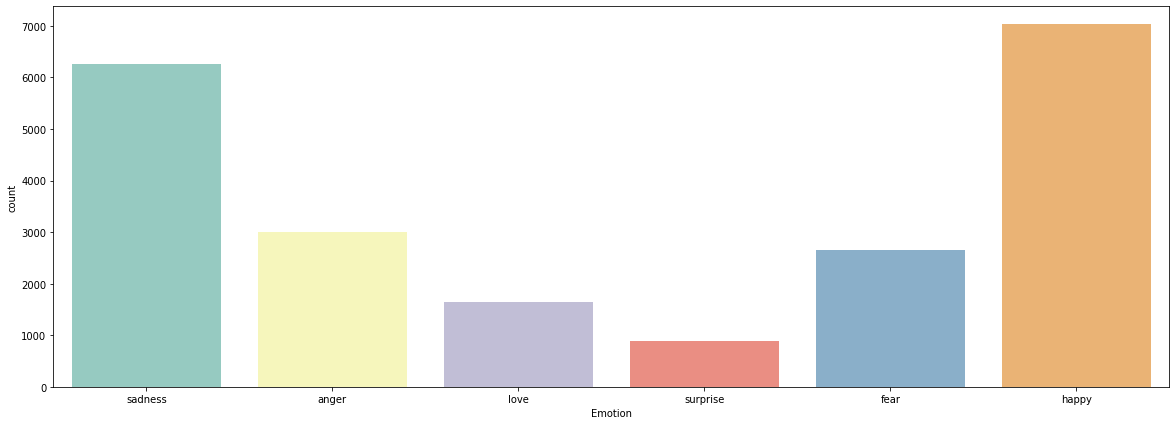

In [ ]:
plt.figure(figsize = (20,7))
#sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Emotion", data=data, palette="Set3", dodge=False)

In [ ]:
data.Emotion = pd.Categorical(data.Emotion)
data['Emotion_categorical'] = data.Emotion.cat.codes
data.head()

,Text,Emotion,Emotion_categorical
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


In [ ]:
# cleaning data 
def cleantext(data):
    
    data = re.sub(r'@[A-Za-z0-9]+', '', data) # remove @mentions
    data = re.sub(r'#', '', data)# remove # tag
    data = re.sub(r'RT[\s]+', '', data) # remove the RT
    data = re.sub(r'https?:\/\/\S+', '', data) # remove links
    data = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', data) # remove unicode characters
    data = re.sub(r'"', '', data)
    data = re.sub(r':', '', data)
    return data

In [ ]:
data['Text']=data['Text'].apply(cleantext)

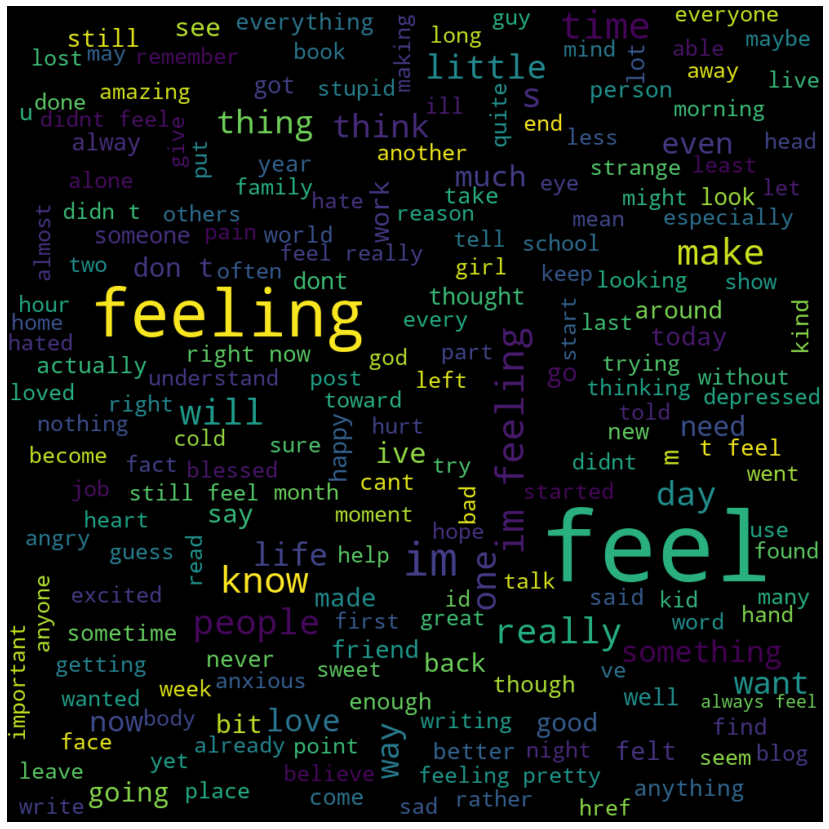

In [ ]:
#finding most common words in the dataset


word= ' '.join([twts for twts in data['Text']])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(word)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.Text).toarray()
labels = data.Emotion_categorical
features.shape

(21459, 6133)

In [ ]:
#for 1st 1o row 
i=0
N=2
for Emotion_categorical, Emotion  in sorted(data.Emotion_categorical.items()):
  features_chi2 = chi2(features, labels == Emotion_categorical)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  #print("# "+Emotion+":")
  print("# '{}':".format(Emotion))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  i=i+1
  if(i==10):
    break

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '4':
  . Most correlated unigrams:
. resentful
. offended
  . Most correlated bigrams:
. feel offended
. feel resentful


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '4':
  . Most correlated unigrams:
. frightened
. anxious
  . Most correlated bigrams:
. feel pressured
. feel threatened


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '0':
  . Most correlated unigrams:
. confident
. successful
  . Most correlated bigrams:
. feel privileged
. feel honored


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '3':
  . Most correlated unigrams:
. longing
. sympathetic
  . Most correlated bigrams:
. feel longing
. feel sympathetic


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '0':
  . Most correlated unigrams:
. punished
. miserable
  . Most correlated bigrams:
. feel bad
. feel ashamed


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '4':
  . Most correlated unigrams:
. impressed
. amazed
  . Most correlated bigrams:
. feel funny
. feel amazed


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '5':
  . Most correlated unigrams:
. feelin
. zone
  . Most correlated bigrams:
. feeling amused
. feeling assured


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '1':
  . Most correlated unigrams:
. feelin
. zone
  . Most correlated bigrams:
. feeling amused
. feeling assured


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '2':
  . Most correlated unigrams:
. feelin
. zone
  . Most correlated bigrams:
. feeling amused
. feeling assured
# '3':
  . Most correlated unigrams:
. feelin
. zone
  . Most correlated bigrams:
. feeling amused
. feeling assured


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#RandomForestClassifier

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(data['Text']).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Emotion'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_r = classifier.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_r))
print(classification_report(y_test, y_pred_r))
print(confusion_matrix(y_test, y_pred_r))

Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

       anger       0.82      0.83      0.83       600
        fear       0.84      0.85      0.84       526
       happy       0.87      0.90      0.89      1399
        love       0.82      0.76      0.79       325
     sadness       0.90      0.88      0.89      1258
    surprise       0.79      0.72      0.75       184

    accuracy                           0.86      4292
   macro avg       0.84      0.82      0.83      4292
weighted avg       0.86      0.86      0.86      4292

[[ 501   18   34    3   40    4]
 [  22  448   22    1   21   12]
 [  24   15 1265   43   46    6]
 [   2    3   69  246    4    1]
 [  48   32   50    7 1108   13]
 [  13   19   14    0    6  132]]


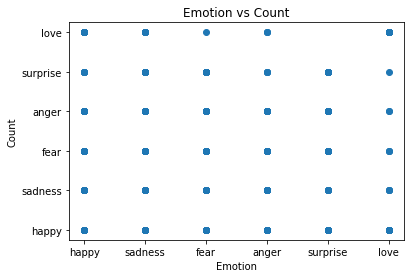

In [ ]:
plt.scatter(y_test, y_pred_r)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion vs Count")
plt.show()

In [ ]:
print(classifier.predict(vectorizer.transform(["i didnt feel humiliated"])))

['sadness']


#Logistic Regression

In [ ]:
lr=LogisticRegression(max_iter=1000, multi_class='multinomial')
lem=lr.fit(X_train, y_train)

In [ ]:
y_pred_l  = lem.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_l))
print(classification_report(y_test, y_pred_l))
print(confusion_matrix(y_test, y_pred_l))

Accuracy: 0.8529822926374651
              precision    recall  f1-score   support

       anger       0.86      0.77      0.81       600
        fear       0.86      0.78      0.82       526
       happy       0.84      0.94      0.89      1399
        love       0.87      0.71      0.78       325
     sadness       0.86      0.92      0.89      1258
    surprise       0.85      0.54      0.66       184

    accuracy                           0.85      4292
   macro avg       0.86      0.77      0.81      4292
weighted avg       0.85      0.85      0.85      4292

[[ 459   17   47    1   76    0]
 [  26  411   40    0   37   12]
 [   8    5 1309   31   45    1]
 [   3    3   77  230   12    0]
 [  27   17   54    3 1152    5]
 [   8   27   31    0   18  100]]


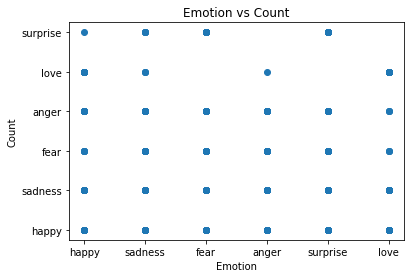

In [ ]:
plt.scatter(y_test, y_pred_l)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion vs Count")
plt.show()

In [ ]:
print(lem.predict(vectorizer.transform(["i feel selfish and spoiled"])))

['anger']


#Multinomial Naive Bayes

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred_m  = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_m))
print(classification_report(y_test, y_pred_m))
print(confusion_matrix(y_test, y_pred_m))

Accuracy: 0.8028890959925443
              precision    recall  f1-score   support

       anger       0.92      0.69      0.79       600
        fear       0.87      0.68      0.76       526
       happy       0.75      0.96      0.84      1399
        love       0.98      0.38      0.54       325
     sadness       0.79      0.93      0.86      1258
    surprise       0.95      0.22      0.36       184

    accuracy                           0.80      4292
   macro avg       0.88      0.64      0.69      4292
weighted avg       0.83      0.80      0.79      4292

[[ 415   11   73    0  101    0]
 [  19  356   74    0   75    2]
 [   5    0 1340    2   52    0]
 [   2    2  155  122   44    0]
 [   9    9   68    0 1172    0]
 [   3   30   72    0   38   41]]


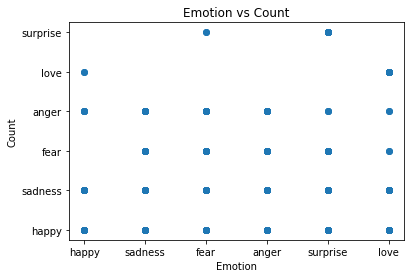

In [ ]:
plt.scatter(y_test, y_pred_m)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion vs Count")
plt.show()

In [ ]:
print(clf.predict(vectorizer.transform(["i dance i should feel pretty"])))

['happy']


#KNeighbour Classifier

In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

In [ ]:
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


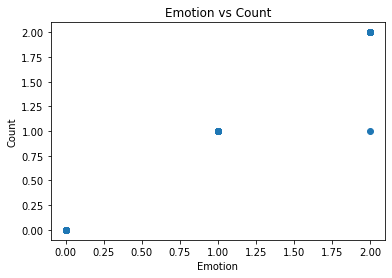

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion vs Count")
plt.show()

#CNN Classifier

In [ ]:
from tqdm.auto import tqdm
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [ ]:
!pip install pydot graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

longest_input = get_longest_text(data['Text'])
longest_input

66

In [ ]:
data_emb = np.zeros((len(data), longest_input, 96))

for i, text in enumerate(tqdm(nlp.pipe(data['Text']), total=len(data)), 0):
    for j, token in enumerate(text, 0):
      if j <= 65:
        data_emb[i, j] = token.vector

  0%|          | 0/21459 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoder = encoder.fit_transform(data['Emotion'])
y = to_categorical(y_encoder)
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
len(encoder.classes_)

6

In [ ]:
import keras
# Prepare the network
inputs = keras.layers.Input((longest_input, 96))
reshaped = keras.layers.Reshape((longest_input, 96, 1))(inputs)

filters = [2, 3, 4]

# Define convolution layers
conv_1 = keras.layers.Conv2D(100, (filters[0], 96), activation='relu')(reshaped)
conv_2 = keras.layers.Conv2D(100, (filters[1], 96), activation='relu')(reshaped)
conv_3 = keras.layers.Conv2D(100, (filters[2], 96), activation='relu')(reshaped)

# Define pooling layers
pool_1 = keras.layers.MaxPooling2D((longest_input - filters[0] +1, 1))(conv_1)
pool_2 = keras.layers.MaxPooling2D((longest_input - filters[1] +1, 1))(conv_2)
pool_3 = keras.layers.MaxPooling2D((longest_input - filters[2] +1, 1))(conv_3)

concatenation = keras.layers.concatenate([pool_1, pool_2, pool_3])
flattened = keras.layers.Flatten()(concatenation)
dense = keras.layers.Dense(100, activation='relu')(flattened)
clf = keras.layers.Dense(len(encoder.classes_), activation='softmax')(dense) 

In [ ]:
# Create the model
model = tf.keras.models.Model(inputs, clf)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 66, 96)]     0           []                               
                                                                                                  
 reshape (Reshape)              (None, 66, 96, 1)    0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 65, 1, 100)   19300       ['reshape[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 1, 100)   28900       ['reshape[0][0]']                
                                                                                              

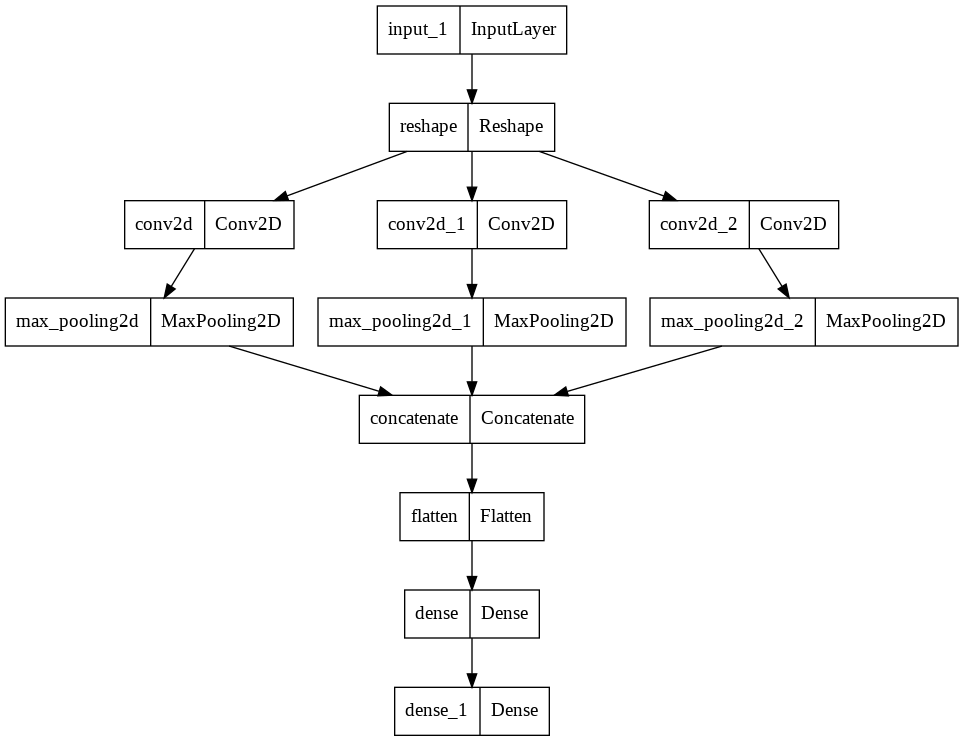

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=False, 
                          show_layer_names=True, rankdir='TB',
                          expand_nested=False, dpi=96)

##Train the Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_emb, y, test_size=0.3)
h_callbacks = model.fit(X_train, y_train, epochs=23, validation_split=0.2, verbose=0)

In [ ]:
# Model evaluation
model.evaluate(X_test, y_test)

202/202 [==============================] - 2s 11ms/step - loss: 3.8028 - acc: 0.4093


[3.8027570247650146, 0.40928858518600464]

In [ ]:
def emotion_prediction(text):
    text_vec = np.zeros((1, longest_input, 96))
    for i, token in enumerate(nlp(text)):
        if i <= longest_input:
            text_vec[0, i] = token.vector

    prediction = np.argmax(model.predict(text_vec))
    return encoder.classes_[prediction]
    print("Accuracy:",accuracy_score(y_test,prediction))

In [ ]:
print(emotion_prediction("i didnt feel humiliated"))
print(emotion_prediction("i didnt feel humiliated"))
print(emotion_prediction("i didnt feel humiliated"))

1/1 [==============================] - 0s 95ms/step
happy
1/1 [==============================] - 0s 23ms/step
happy
1/1 [==============================] - 0s 19ms/step
happy


In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion vs Count")
plt.show()

NameError: ignored

In [ ]:
#print("Accuracy:",accuracy_score(y_test,prediction))